**Bagging Meta Estimator and Random forest**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [67]:
x,y = make_moons(n_samples=1000,noise=0.25)

In [68]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [69]:
df = pd.DataFrame(df)
df.head()

,x1,x2,y
0,2.027679,0.283125,1
1,1.591631,-0.190089,1
2,2.146850,0.019802,1
3,0.094926,1.035504,0
4,-0.601359,0.132862,0


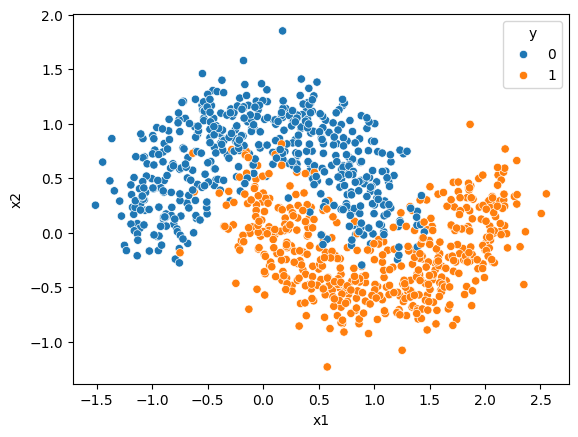

In [70]:
sns.scatterplot(x="x1",y="x2",hue="y",data=df)
plt.show()

In [71]:
x_a = df.drop("y",axis=1)
y_a = df["y"]

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [74]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [75]:
svc.score(x_test,y_test)*100,svc.score(x_train,y_train)*100

(95.0, 94.0)

In [76]:
bg = BaggingClassifier(SVC(),n_estimators=50,)
bg.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=50)

In [77]:
bg.score(x_test,y_test)*100,bg.score(x_train,y_train)*100

(95.0, 93.75)

In [78]:
rf = RandomForestClassifier(n_estimators=30,min_samples_split=15,min_samples_leaf=15)
rf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=15,
                       n_estimators=30)

In [79]:
rf.score(x_test,y_test)*100,rf.score(x_train,y_train)*100

(93.5, 94.375)

In [80]:
rf.predict([[-0.944637,0.690624]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])